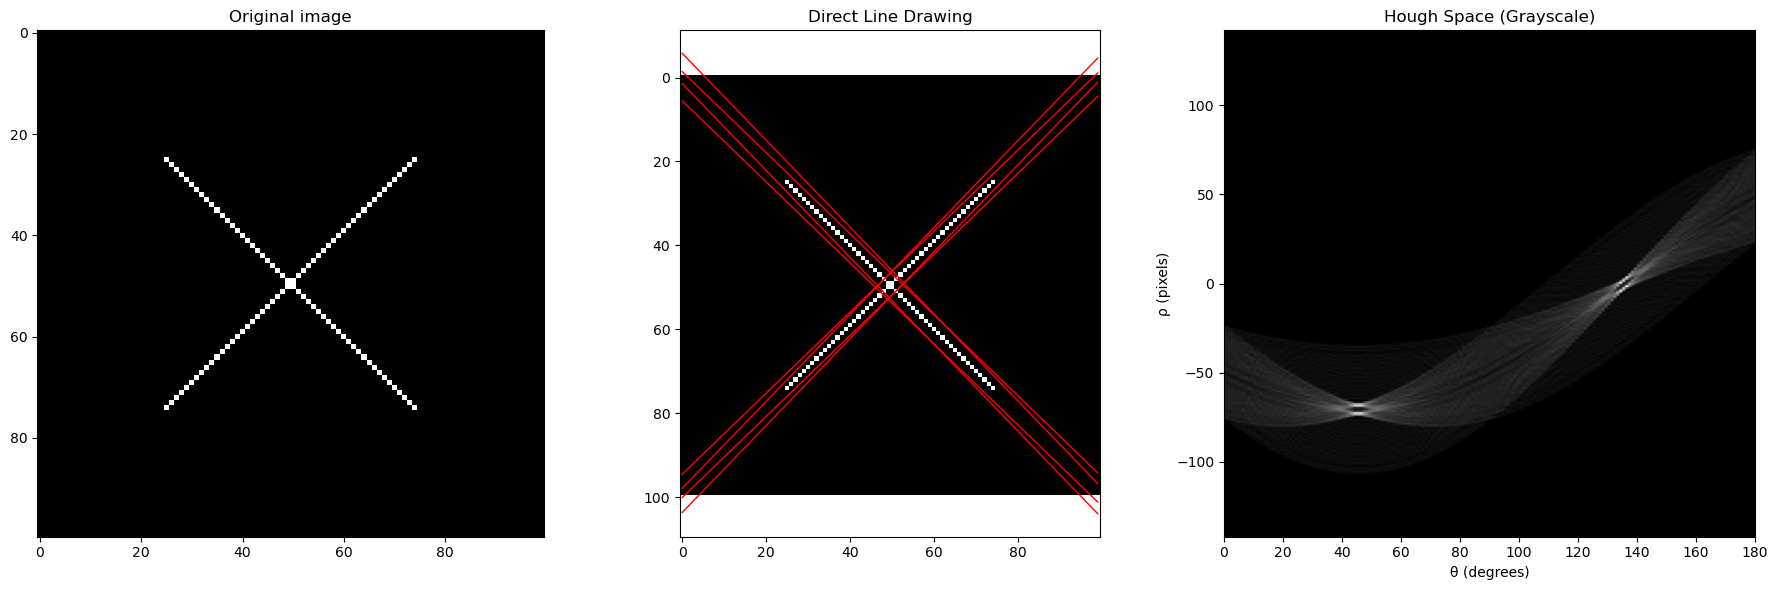

In [7]:
#3.1

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature, transform, draw

def hough_transform(edge_image, theta_step=1, rho_step=1, threshold=100):
    # Chose range and discretization of ρ and θ.
    rows, cols = edge_image.shape
    diagonal = int(np.ceil(np.sqrt(rows**2 + cols**2)))  # Edge image diagonal length
    thetas = np.deg2rad(np.arange(0, 180, theta_step))   # θ : 0-180°
    rhos = np.arange(-diagonal, diagonal, rho_step)      # ρ : [-d, d]
    # Create accumulator 2D array (Hough Space)
    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    
    # Iterate over all edge pixels
    edge_points = np.argwhere(edge_image)  # Get all the edge coordinates [y, x]
    
    for (y, x) in edge_points:            # Iterate over each edge point
        for theta_idx, theta in enumerate(thetas):  # Iterate every θ
            # Calculate the corresponding value of ρ
            rho = x * np.cos(theta) + y * np.sin(theta)
            
            # Ensure that the accumulator array index cannot be negative
            rho_idx = int(round((rho + diagonal) / rho_step))
            
            # Updating the accumulator (to ensure that it does not go out of bounds)
            if 0 <= rho_idx < len(rhos):
                accumulator[rho_idx, theta_idx] += 1
    
    # Lines correspond to accumulator values larger than a certain threshold.
    lines = []
    for rho_idx in range(accumulator.shape[0]):
        for theta_idx in range(accumulator.shape[1]):
            if accumulator[rho_idx, theta_idx] >= threshold:
                lines.append( (rhos[rho_idx], thetas[theta_idx]) )
    
    return lines, accumulator

image = io.imread('cross.png')
edges = feature.canny(image, sigma=2)  # Canny Edge Detection

detected_lines, hough_space = hough_transform(edges, theta_step=1, rho_step=1, threshold=50)
fig, axes = plt.subplots(1, 3, figsize=(18,6))
axes[0].imshow(image,cmap='gray')
axes[0].set_title('Original image')

axes[1].imshow(image, cmap='gray')
for rho, theta in detected_lines:
    x = np.array([0, image.shape[1]-1])  
    y = (rho - x * np.cos(theta)) / np.sin(theta)  
    axes[1].plot(x, y, color='red', linewidth=1)
axes[1].set_title('Direct Line Drawing')


axes[2].imshow(hough_space, cmap='gray', aspect='auto', 
           extent=[0, 180, -hough_space.shape[0]//2, hough_space.shape[0]//2])
axes[2].set_xlabel('θ (degrees)')
axes[2].set_ylabel('ρ (pixels)')
axes[2].set_title('Hough Space (Grayscale)')

plt.tight_layout()
plt.savefig('A6_3.2_1.png')
plt.show()

[[138 136]
 [141 134]
 [143 136]
 [146 134]
 [214  44]
 [214  46]]
[ 0 99] [-5.75822616 96.75927491]
[ 0 99] [-1.39016359 94.21302511]
[ 0 99] [  1.43955654 103.9570576 ]
[ 0 99] [  5.56065436 101.16384307]
[ 0 99] [103.64807085   1.13056979]
[ 0 99] [100.09177855   4.48858985]


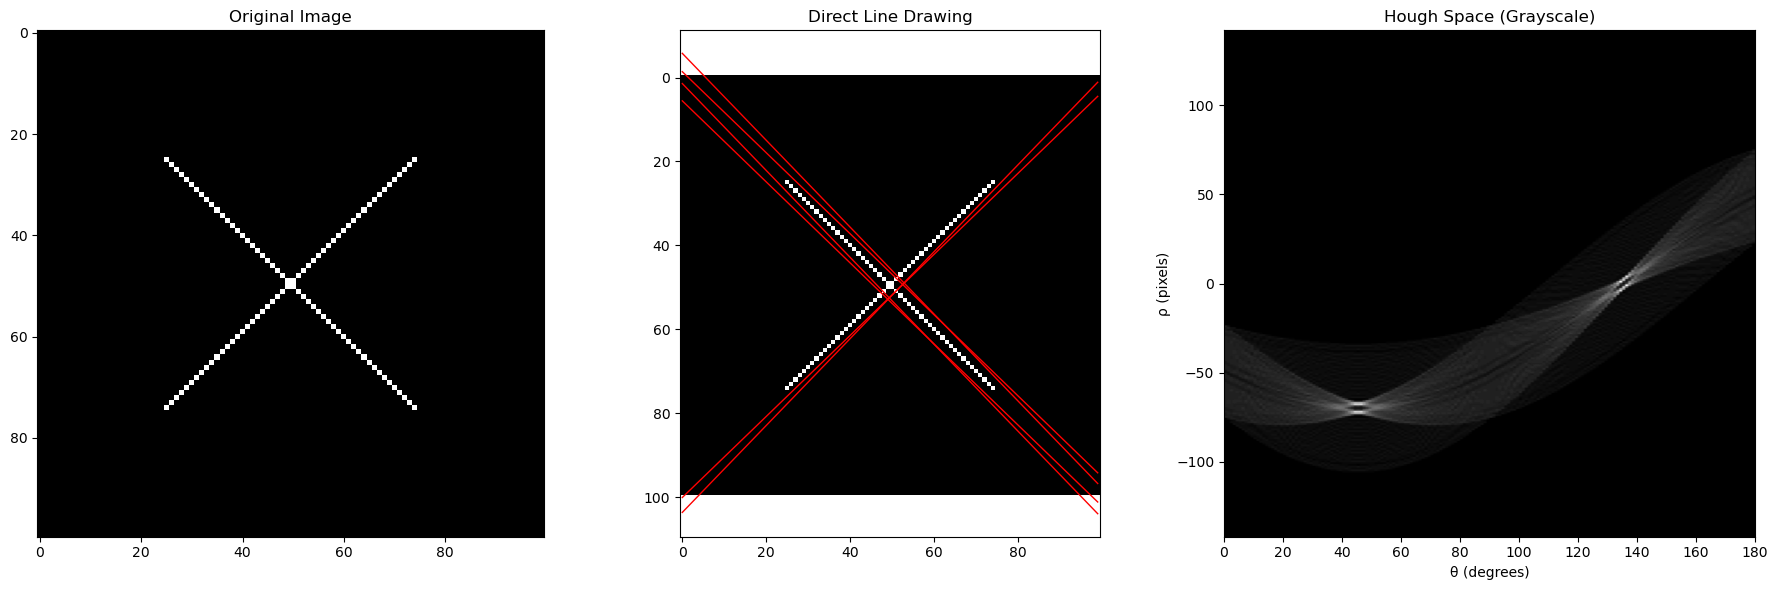

In [181]:
#3.2

theta_step = 1
threshold = 50

thetas = np.deg2rad(np.arange(0, 180, theta_step))
hspace, angles, dists = transform.hough_line(edges, theta=thetas)
peaks = np.argwhere(hspace > threshold)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(image, cmap='gray')
for rho_idx, theta_idx in peaks:
    theta = thetas[theta_idx]
    rho = dists[rho_idx]
    
    x = np.array([0, image.shape[1]-1])
    y = (rho - x * np.cos(theta)) / np.sin(theta)
    axes[1].plot(x, y, color='red', linewidth=1)
axes[1].set_title('Direct Line Drawing')

diagonal = int(np.ceil(np.sqrt(edges.shape[0]**2 + edges.shape[1]**2)))
axes[2].imshow(hspace, cmap='gray', aspect='auto', 
              extent=[0, 180, -diagonal, diagonal])
axes[2].set_xlabel('θ (degrees)')
axes[2].set_ylabel('ρ (pixels)')
axes[2].set_title('Hough Space (Grayscale)')

plt.tight_layout()
plt.savefig('A6_3.2_2.png')
plt.show()

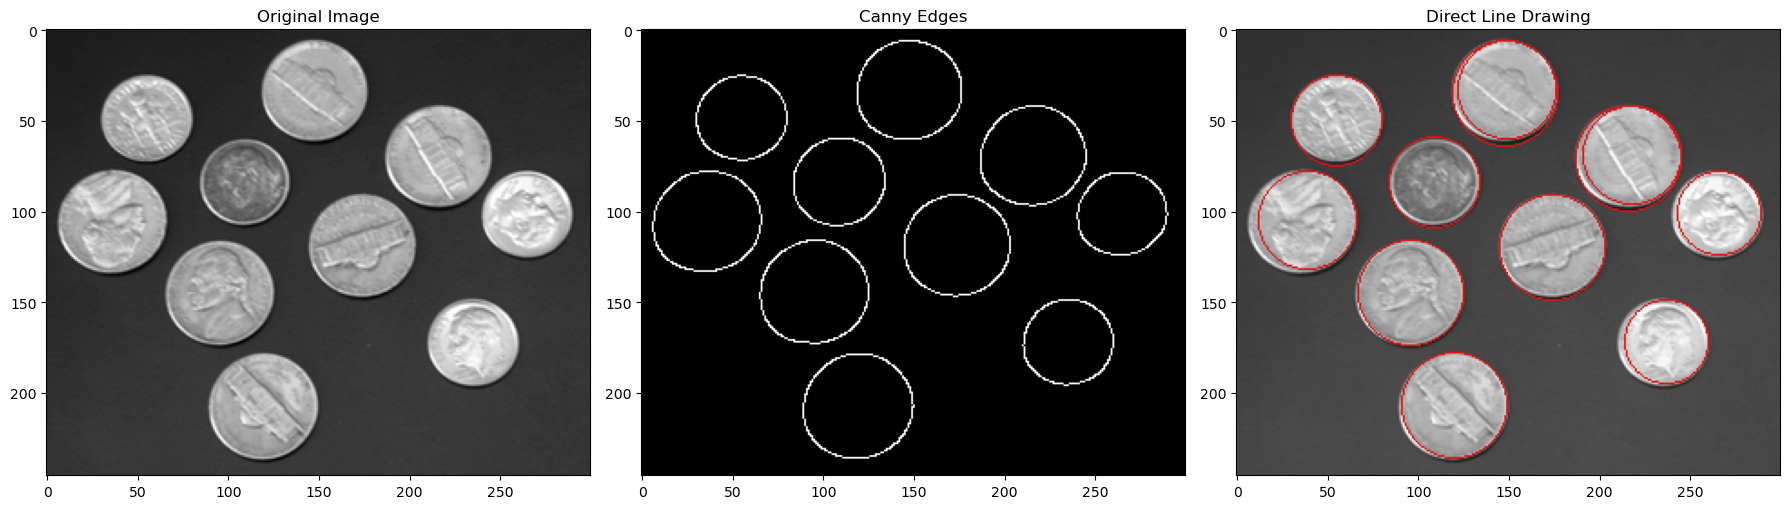

In [89]:

from skimage import io, color, feature, transform, draw

image = io.imread('coins.png')

edges = feature.canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(15, 35, 2)
hough_res = transform.hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = transform.hough_circle_peaks(hough_res, hough_radii, total_num_peaks=12)

fig, axes = plt.subplots(1, 3, figsize=(18,6))
axes[0].imshow(image,cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Canny Edges')


image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circle_y, circle_x = draw.circle_perimeter(center_y, center_x, radius, shape=image.shape)
    image[ circle_y, circle_x] = (220, 20, 20)
    # axes[2].plot(circle_x, circle_y, 'r', linewidth=1)
axes[2].imshow(image,cmap='gray')
axes[2].set_title('Direct Line Drawing')

plt.tight_layout()
plt.savefig('A7_3.3.png')
plt.show()